# AutoML
---------------------------------

This example shows how we can use AutoML to search for an optimized pipeline for our task.

Import the breast cancer dataset from [sklearn.datasets](https://scikit-learn.org/stable/datasets/index.html#wine-dataset). This is a small and easy to train dataset whose goal is to predict whether a patient has breast cancer or not.

## Load the data

In [1]:
# Import packages
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from atom import ATOMClassifier

In [2]:
# Get the dataset's features and targets
X, y = load_breast_cancer(return_X_y=True)

## Run the pipeline

In [3]:
atom = ATOMClassifier(X, y, n_jobs=6, verbose=2, warnings=False, random_state=1)

<< ================== ATOM ================== >>
Algorithm task: binary classification.
Parallel processing with 6 cores.

Dataset stats ================== >>
Shape: (569, 31)
Scaled: False
-----------------------------------
Train set size: 456
Test set size: 113
-----------------------------------
Train set balance: 0:1 <==> 1.0:1.7
Test set balance: 0:1 <==> 1.0:1.5
-----------------------------------
Distribution of classes:
|    |   dataset |   train |   test |
|---:|----------:|--------:|-------:|
|  0 |       212 |     167 |     45 |
|  1 |       357 |     289 |     68 |



In [4]:
# It is possible to add custom estimator's to the pipeline
atom.add(StandardScaler())

Transformer StandardScaler successfully added to the pipeline.


In [5]:
# Check that the scaling worked
atom.scaled

True

In [6]:
# Find an optimized pipeline using AutoML
atom.automl(scoring="accuracy", max_time_mins=10, template="Selector-Transformer-Classifier")

Fitting automl algorithm...



Generation 1 - Current best internal CV score: 0.9715002388915434

Generation 2 - Current best internal CV score: 0.9780936454849499

Generation 3 - Current best internal CV score: 0.9780936454849499

Generation 4 - Current best internal CV score: 0.9780936454849499

Generation 5 - Current best internal CV score: 0.980315336837076

Generation 6 - Current best internal CV score: 0.980315336837076

Generation 7 - Current best internal CV score: 0.980315336837076

Generation 8 - Current best internal CV score: 0.980315336837076

Generation 9 - Current best internal CV score: 0.980315336837076

Generation 10 - Current best internal CV score: 0.980315336837076

Generation 11 - Current best internal CV score: 0.980315336837076

Generation 12 - Current best internal CV score: 0.980315336837076

Generation 13 - Current best internal CV score: 0.980315336837076

Generation 14 - Current best internal CV score: 0.9824892498805543

Generation 15 - Current best internal CV score: 0.982489249880554

## Analyze the results

In [7]:
# Check the new transformers in the branch
atom.branch.status()

Branch: master
 --> Pipeline: 
   >>> StandardScaler
     --> copy: True
     --> with_mean: True
     --> with_std: True
   >>> SelectFwe
     --> score_func: <function f_classif at 0x000002523A01D040>
     --> alpha: 0.018000000000000002
   >>> Normalizer
     --> norm: l2
     --> copy: True
 --> Models: SGD


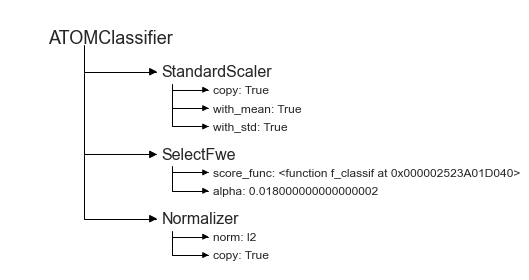

In [8]:
# Or draw the pipeline
atom.plot_pipeline()

In [9]:
# Note that the SGD model is also merged with atom
atom.sgd

Stochastic Gradient Descent
 --> Estimator: SGDClassifier
 --> Evaluation: accuracy: 0.9823

In [10]:
# The pipeline can be exported to a sklearn pipeline
pl = atom.export_pipeline(model="sgd")
print(pl)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('selectfwe', SelectFwe(alpha=0.018000000000000002)),
                ('normalizer', Normalizer()),
                ('SGD',
                 SGDClassifier(alpha=0.01, eta0=0.01, l1_ratio=1.0,
                               learning_rate='invscaling', loss='squared_hinge',
                               penalty='elasticnet', power_t=0.1,
                               random_state=1))])
